#### E/19/129
#### CO543 - Lab01
## Section: Lab tasks

### Basic Codes

In [2]:
# import modules
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
def showImg(I):
    plt.imshow(I)
    plt.title('Image')
    plt.show()

def show2Img(A, B):
    plt.subplot(121),plt.imshow(A),plt.title('Input')
    plt.subplot(122),plt.imshow(B),plt.title('Output')
    plt.show()

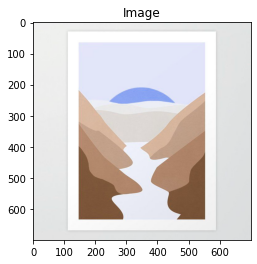

In [4]:
img = cv2.imread("eb9931c3f39215a193826992d013a17a.jpg")
cv2.imwrite("img.jpg", img)
showImg(img)

In [5]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

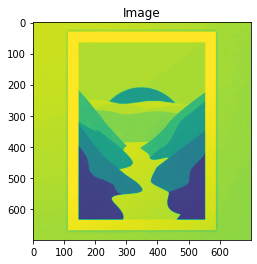

In [8]:
imgGray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
showImg(imgGray)

### Task 01

a. imcomplement(I) - Inverts I

In [9]:
def imcomplement(I):
    return 255 - I

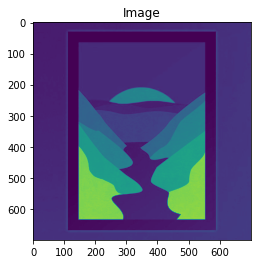

In [11]:
imgCom = imcomplement(imgGray)
showImg(imgCom)

b. flipud(I) - Flips image along x-axis

In [12]:
def flipud(I):
    return I[::-1]

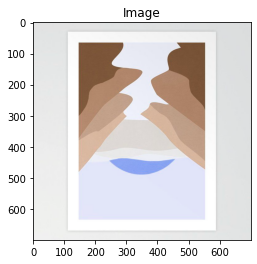

In [13]:
imgFlipud = flipud(img)
showImg(imgFlipud)

c. fliplr(I) - Flips image along y-axis

In [14]:
def fliplr(I):
    return I[:, ::-1]

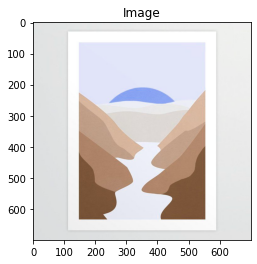

In [16]:
imgFliplr = fliplr(img)
showImg(imgFliplr)

d. imresize(I,[x y]) with nearest-neighbour interpolation

In [17]:
def imresize(I, size):
    x, y = size
    x_old, y_old = I.shape

    x_scale = x_old/x
    y_scale = y_old/y

    img = np.zeros((x, y), dtype=np.uint8)

    for i in range(x):
        for j in range(y):
            img[i, j] = I[int(i*x_scale), int(j*y_scale)]

    return img

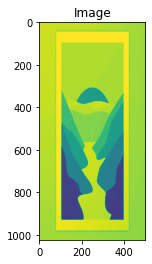

In [18]:
imgResize =  imresize(imgGray, (1024, 500))
showImg(imgResize)

### Task 02

##### Translation

In [25]:
def translation(I, x, y):
    if len(img.shape) == 2:
        rows,cols = I.shape
    else:
        rows,cols, t = I.shape

    M = np.float32([[1,0,x],[0,1,y]])
    dst = cv2.warpAffine(I,M,(cols,rows))
    return dst

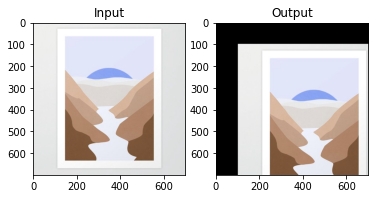

In [26]:
imgTran = translation(img, 100, 100)
show2Img(img, imgTran)

##### Shearing - Vertical

In [27]:
def shearVer(I, x):
    if len(img.shape) == 2:
        rows,cols = I.shape
    else:
        rows,cols, t = I.shape
        
    M = np.float32([[1,x,0],[0,1,0]])
    dst = cv2.warpAffine(I,M,(cols,rows))
    return dst

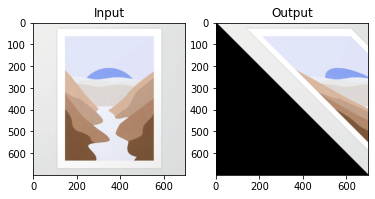

In [28]:
imgShearVer = shearVer(img, 1)
show2Img(img, imgShearVer)

##### Shearing - Horizontal

In [29]:
def shearHor(I, x):
    if len(img.shape) == 2:
        rows,cols = I.shape
    else:
        rows,cols, t = I.shape
        
    M = np.float32([[1,0,0],[x,1,0]])
    dst = cv2.warpAffine(I,M,(cols,rows))
    return dst

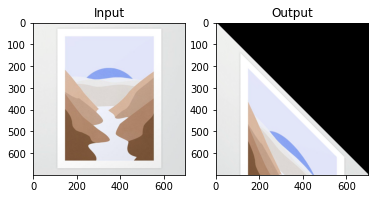

In [30]:
imgShearhor = shearHor(img, 1)
show2Img(img, imgShearhor)

##### Scaling

In [31]:
def scaling(I, x, y):
    if len(img.shape) == 2:
        rows,cols = I.shape
    else:
        rows,cols, t = I.shape
        
    M = np.float32([[x,0,0],[x,y,0]])
    dst = cv2.warpAffine(I,M,(cols,rows))
    return dst

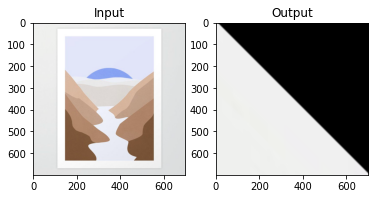

In [32]:
imgScale = scaling(img, 10, 10)
show2Img(img, imgScale)